In [42]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df["job_title_short"]=="Data Analyst"].copy()

In [4]:
#Explode the job_skills into individual rows
df_exploded = df_DA.explode("job_skills")

#Calculate the avg salary and count of job posting per skill
skill_stats = df_exploded.groupby("job_skills").agg(
    median_salary=("salary_year_avg", "median"),
    skill_count=("job_skills", "count") )
#Limit to top skills
skill_count=20
skill_stats=skill_stats.sort_values(by="skill_count", ascending=False).head(skill_count)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


In [9]:
from adjustText import adjust_text

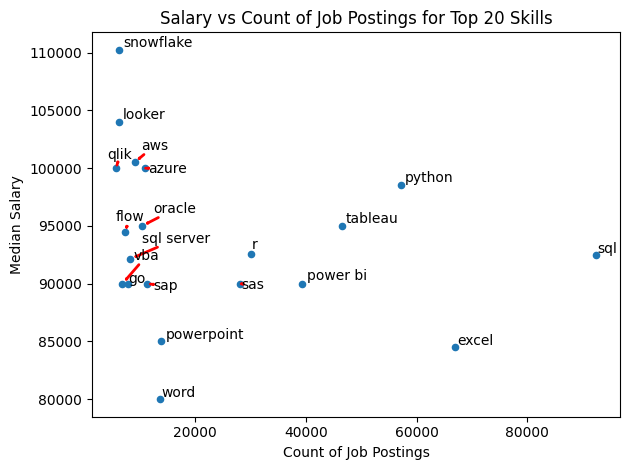

In [ ]:
skill_stats.plot(
    kind="scatter", 
    x="skill_count",
    y="median_salary")

texts=[]
for i,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i],  txt))
    
adjust_text(texts,arrowprops=dict(arrowstyle= "->" ,color="red",lw=2 ))#etiketlerin birbirine çarpışmadan düzgün bir şekilde yerleşmesini sağlar.ve labeli okla gösterir 

plt.xlabel("Count of Job Postings")
plt.ylabel("Median Salary")
plt.title(f"Salary vs Count of Job Postings for Top {skill_count} Skills")
plt.tight_layout()
plt.show()  

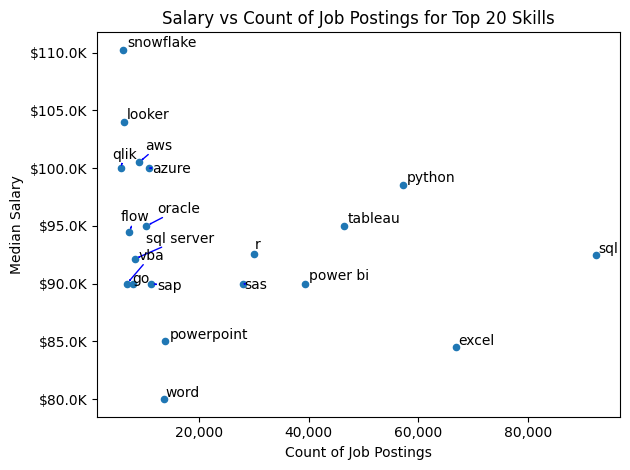

In [ ]:
#fig,ax = plt.subplots()

skill_stats.plot(
    kind="scatter", 
    x="skill_count", 
    y="median_salary")
texts=[]
for i,txt in enumerate(skill_stats.index):  
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i],  txt))  
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="blue", lw=1))  # Adjust text to avoid overlap 

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f"${y/1000}K"))  # Format y-axis as currencyBurada y ekseni için özel bir format ayarlıyorsun (aslında çok fark etmiyor çünkü y değerini olduğu gibi gösteriyor, istersen para birimi gibi gösterecek şekilde değiştirebilirsin).
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))# X eksenine virgül ekler
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Salary")
plt.title(f"Salary vs Count of Job Postings for Top {skill_count} Skills")
plt.tight_layout()
plt.show()